In [1]:
cd C:\Users\dhant\OneDrive\Desktop\simplilearn\Capstone\Project 3

C:\Users\dhant\OneDrive\Desktop\simplilearn\Capstone\Project 3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as p
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Project Task: Week 1

### 1. Perform a preliminary data inspection and data cleaning.



In [3]:
data=pd.read_excel('Online Retail.xlsx')
data.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom

# 1. Understand the dataset:

#### a.	Identify the shape of the dataset

In [4]:
data.shape

(541909, 8)

#### b.	Identify the size of the dataset

In [5]:
data.size

4335272

### c. Identify the columns of the datase

In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### d.	Identify the data types of the dataset

In [7]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### e.	Identify the information of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### f. identifying the number of unique values of dataset

In [9]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### a. Identifying the total profile report of dataset


In [62]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
pp.ProfileReport(data)

In [10]:
####  skewness of data and its visualization 

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

Skewness for data : 


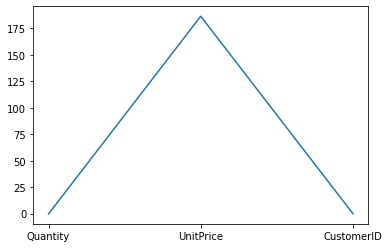

In [11]:
print(data.skew() )
p.plot(data.skew()) 
print( '\nSkewness for data : ')

###  kurtosis and its visualization

Quantity      119769.160031
UnitPrice      59005.719097
CustomerID        -1.179982
dtype: float64

kurtosis of data : 


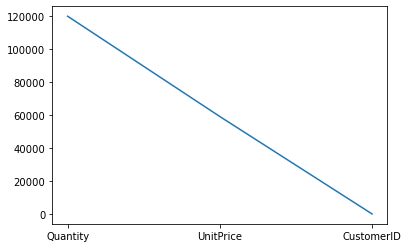

In [12]:
print(data.kurtosis())
p.plot(data.kurtosis()) 
print( '\nkurtosis of data : ')

# Statistical summary


In [13]:
data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

###  a. Check for missing data and formulate an apt strategy to treat them.



In [14]:
typecol = ['Categorical', 'Categorical','Categorical', 'Discrete', 'Date', 'Continuous' , 'Categorical' , 'Categorical' ]
missingdf = pd.DataFrame({'Columns' : data.columns.to_list(), 'Type of data' : typecol, 'No of missing data' : data.isna().sum()})
def highlight_max(s):
    is_max = s 
    return ['background-color: pink' if v else '' for v in is_max]
missingdf.style.apply(highlight_max, subset = ['No of missing data'])
missingdf.style.hide_index()

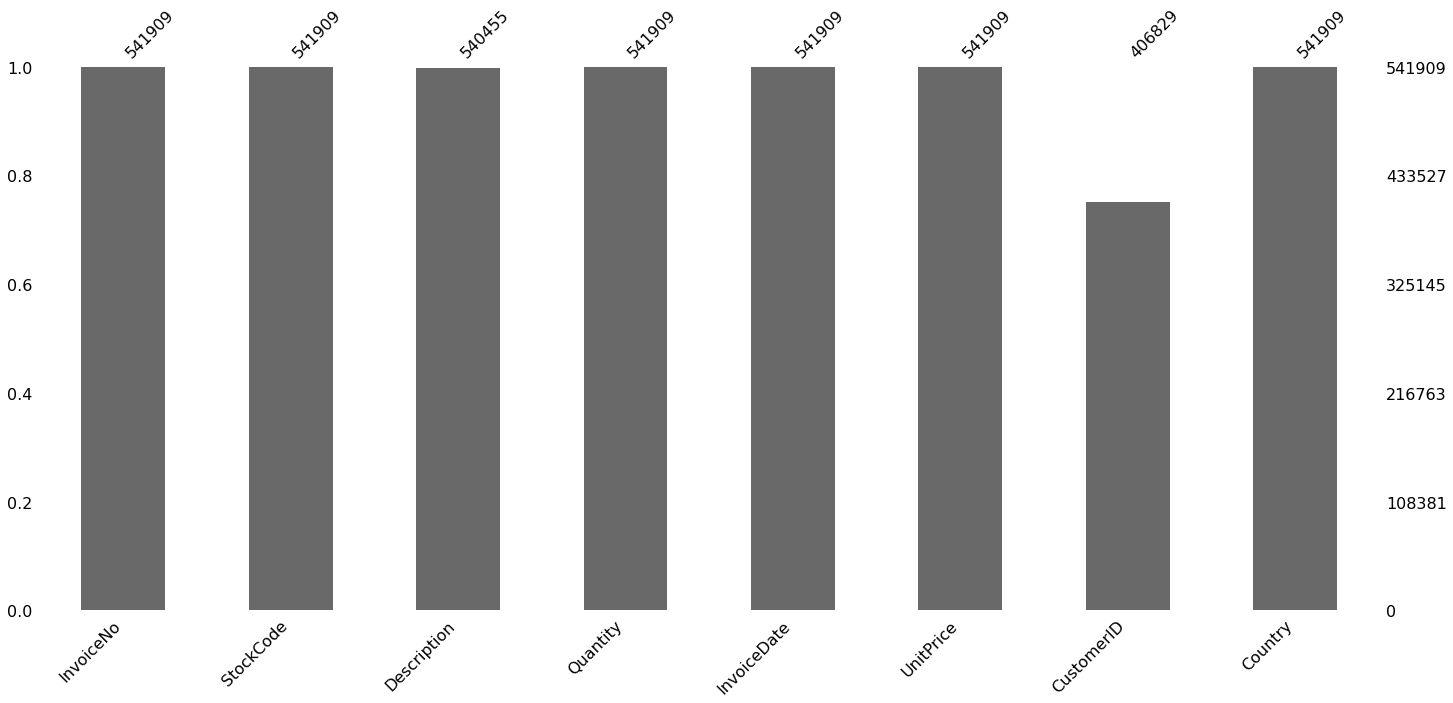

In [15]:
msno.bar(data)
plt.show()

In [16]:
print ("No of records before dropping customer ID column")
print (len(data))
data.drop(data[data['CustomerID'].isna()].index, inplace = True)
data.reset_index(drop=True)
print ("No of records after dropping customer ID column")
print (len(data))
print ("Is there any missing data in Description column after dropping the Null Customer ID columns")
print (any(data['Description'].isna()==True))
missingdf = pd.DataFrame({'Columns' : data.columns.to_list(), 'No of missing data after cleaning' : data.isna().sum()})
missingdf.style.hide_index()

No of records before dropping customer ID column
541909
No of records after dropping customer ID column
406829
Is there any missing data in Description column after dropping the Null Customer ID columns
False


### b. Remove duplicate data records.


In [17]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5225 rows x 8 columns]

In [18]:
print ("No of records before dropping duplicate records")
print (len(data))
data.drop_duplicates(inplace=True)
data.reset_index(drop=True)
print ("No of records after dropping duplicate records")
print (len(data))

No of records before dropping duplicate records
406829
No of records after dropping duplicate records
401604


### c. Perform descriptive analytics on the given data.



In [27]:
data['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [19]:
data.describe(include=['O'])

InvoiceNo StockCode                         Description  \
count      401604    401604                              401604   
unique      22190      3684                                3896   
top        576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq          542      2065                                2058   

               Country  
count           401604  
unique              37  
top     United Kingdom  
freq            356728

### Observe the countries that have most of the customers residing

In [30]:
country_df=pd.DataFrame(data.Country.value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + ' %')
country_df

Country
United Kingdom  88.83 %
Germany          2.36 %
France           2.11 %
EIRE             1.86 %
Spain            0.63 %
Netherlands      0.59 %
Belgium          0.52 %
Switzerland      0.47 %
Portugal         0.37 %
Australia        0.31 %

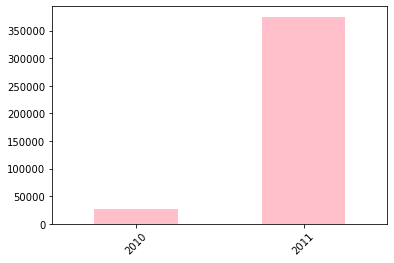

In [34]:
data.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45, color='pink');

### Let us visualize the customer trend on a monthly basis in the year 2011



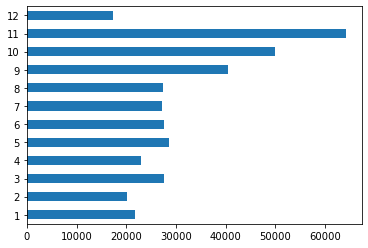

In [37]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False)))]
data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='barh');

### Visualize the Items contributing to maximum Price Value



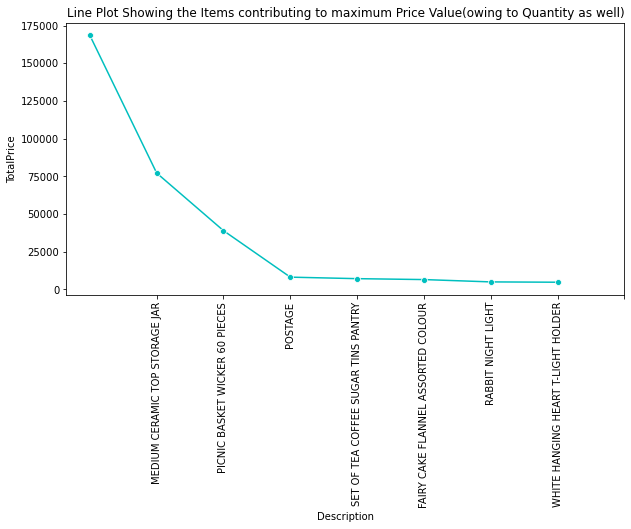

In [38]:
data['TotalPrice'] = data.Quantity * data.UnitPrice
df =data.TotalPrice.sort_values(ascending=False).head(10).to_frame().style.hide_index()
desc = data.sort_values(by='TotalPrice', ascending=False)['Description'].head(10)
price = data.sort_values(by='TotalPrice', ascending=False)['TotalPrice'].head(10)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(y=price,x=desc, marker='o', color='c',).set_title('Line Plot Showing the Items contributing to maximum Price Value(owing to Quantity as well)')
plt.xticks(range(1,9), rotation=90)
plt.show();

### Let us explore the data some more!



In [39]:
print ("First business transaction date is {}".format(data.InvoiceDate.min()))
print ("Last business transaction  date is {}".format(data.InvoiceDate.max()))
monthly_gross =data[data.InvoiceDate.dt.year==2011].groupby(data.InvoiceDate.dt.month).TotalPrice.sum()
df = pd.DataFrame(monthly_gross)
df.index.name = 'Invoice Month'
df

First business transaction date is 2010-12-01 08:26:00
Last business transaction  date is 2011-12-09 12:50:00


TotalPrice
Invoice Month             
1               473731.900
2               435534.070
3               578576.210
4               425222.671
5               647011.670
6               606862.520
7               573112.321
8               615078.090
9               929356.232
10              973306.380
11             1126815.070
12              341539.430

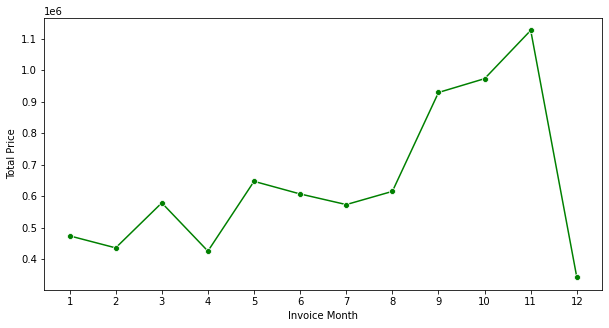

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o', color='g');
plt.xlabel('Invoice Month')
plt.ylabel('Total Price')
plt.xticks(range(1,13))
plt.show();

                                     Description
WHITE HANGING HEART T-LIGHT HOLDER          2058
REGENCY CAKESTAND 3 TIER                    1894
JUMBO BAG RED RETROSPOT                     1659
PARTY BUNTING                               1409
ASSORTED COLOUR BIRD ORNAMENT               1405
...                                          ...
RED ROSE AND LACE C/COVER                      1
PINK CHRISTMAS FLOCK DROPLET                   1
M/COLOUR POM-POM CURTAIN                       1
ASSORTED COLOUR SILK GLASSES CASE              1
BLACK GLASS BRACELET W HEART CHARMS            1

[3896 rows x 1 columns]


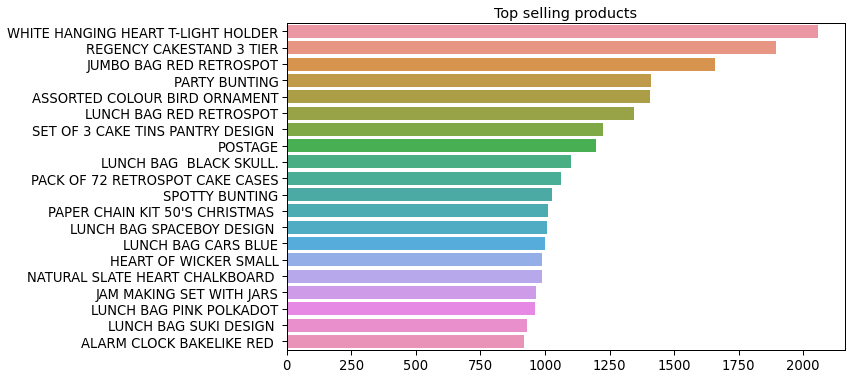

In [42]:
print(pd.DataFrame(data['Description'].value_counts()))
top_products = data['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

# Data Transformation:

### 2. Perform cohort analysis

### (a) Create month cohort of customers and analyze active customers in each cohort:


In [20]:
# Convert to InvoiceDate to Year-Month format
data['month_year'] = data['InvoiceDate'].dt.to_period('M')
data['month_year'].nunique()

13

In [21]:
month_cohort = data.groupby('month_year')['CustomerID'].nunique()
month_cohort


month_year
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

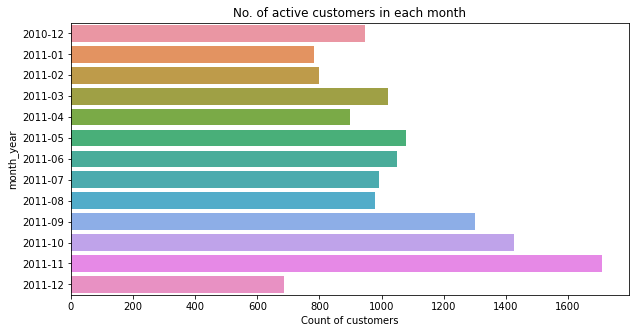

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

### (b) Analyze the retention rate of customers:

In [23]:
month_cohort - month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [24]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

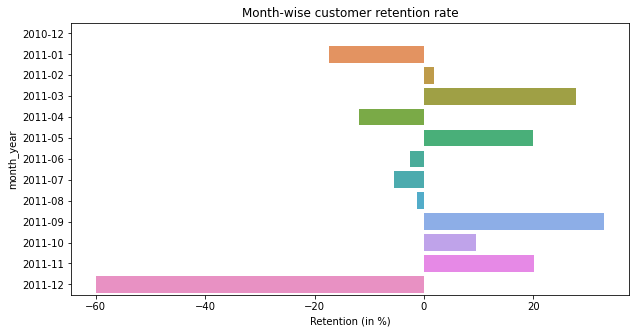

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

# Project Task: Week 2

### Data Modeling :

### Monetary analysis:

In [26]:
data['amount'] = data['Quantity']*data['UnitPrice']
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country month_year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    2010-12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    2010-12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12   

   amount  
0   15.30  
1   20.34  
2   22.00  
3   20.34  
4   20.34

In [27]:
data_monetary = data.groupby('CustomerID').sum()['amount'].reset_index()
data_monetary

CustomerID   amount
0        12346.0     0.00
1        12347.0  4310.00
2        12348.0  1797.24
3        12349.0  1757.55
4        12350.0   334.40
...          ...      ...
4367     18280.0   180.60
4368     18281.0    80.82
4369     18282.0   176.60
4370     18283.0  2045.53
4371     18287.0  1837.28

[4372 rows x 2 columns]

### Frequency Analysis:

In [28]:
data_frequency = data.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
# data_freqency = data.drop_duplicates('InvoiceNo').groupby('CustomerID').count()['InvoiceNo'].reset_index()
data_frequency


CustomerID  InvoiceNo
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]

### Recency Analysis:

In [30]:
# We will fix reference date for calculating recency as last transaction day in data + 1 day
from datetime import timedelta
ref_day = max(data['InvoiceDate']) + timedelta(days=1)
data['days_to_last_order'] = (ref_day - data['InvoiceDate']).dt.days
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country month_year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    2010-12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    2010-12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12   

   amount  days_to_last_order  
0   15.30                 374  
1   20.34                 374  
2   22.00                 374  
3   20.34                 374  
4   20.34                 374

In [31]:
data_recency = data.groupby('CustomerID')['days_to_last_order'].min().reset_index()
data_recency

CustomerID  days_to_last_order
0        12346.0                 326
1        12347.0                   2
2        12348.0                  75
3        12349.0                  19
4        12350.0                 310
...          ...                 ...
4367     18280.0                 278
4368     18281.0                 181
4369     18282.0                   8
4370     18283.0                   4
4371     18287.0                  43

[4372 rows x 2 columns]

### Calculate RFM metrics:



In [32]:
data_rf = pd.merge(data_recency, data_frequency,  on='CustomerID', how='inner')
data_rfm = pd.merge(data_rf, data_monetary, on='CustomerID', how='inner')
data_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
data_rfm.head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_labels, dtype: int64

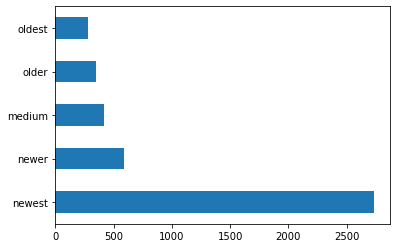

In [33]:
data_rfm['recency_labels'] = pd.cut(data_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
data_rfm['recency_labels'].value_counts().plot(kind='barh');
data_rfm['recency_labels'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

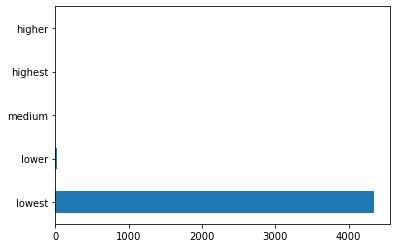

In [34]:
data_rfm['frequency_labels'] = pd.cut(data_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
data_rfm['frequency_labels'].value_counts().plot(kind='barh');
data_rfm['frequency_labels'].value_counts()

smallest    4357
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

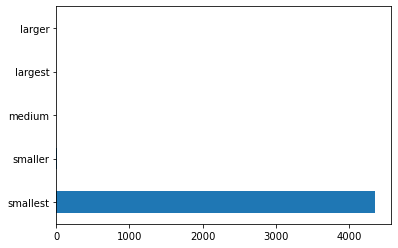

In [35]:
data_rfm['monetary_labels'] = pd.cut(data_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
data_rfm['monetary_labels'].value_counts().plot(kind='barh');
data_rfm['monetary_labels'].value_counts()

In [36]:
data_rfm['rfm_segment'] = data_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
data_rfm.head()

CustomerID  Recency  Frequency  Monetary recency_labels frequency_labels  \
0     12346.0      326          2      0.00         oldest           lowest   
1     12347.0        2          7   4310.00         newest           lowest   
2     12348.0       75          4   1797.24         newest           lowest   
3     12349.0       19          1   1757.55         newest           lowest   
4     12350.0      310          1    334.40         oldest           lowest   

  monetary_labels             rfm_segment  
0        smallest  oldest-lowest-smallest  
1        smallest  newest-lowest-smallest  
2        smallest  newest-lowest-smallest  
3        smallest  newest-lowest-smallest  
4        smallest  oldest-lowest-smallest

### RFM Score:

In [37]:
recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

data_rfm['rfm_score'] = data_rfm['recency_labels'].map(recency_dict).astype(int)+ data_rfm['frequency_labels'].map(frequency_dict).astype(int) + data_rfm['monetary_labels'].map(monetary_dict).astype(int)
data_rfm.head(10)

CustomerID  Recency  Frequency  Monetary recency_labels frequency_labels  \
0     12346.0      326          2      0.00         oldest           lowest   
1     12347.0        2          7   4310.00         newest           lowest   
2     12348.0       75          4   1797.24         newest           lowest   
3     12349.0       19          1   1757.55         newest           lowest   
4     12350.0      310          1    334.40         oldest           lowest   
5     12352.0       36         11   1545.41         newest           lowest   
6     12353.0      204          1     89.00         medium           lowest   
7     12354.0      232          1   1079.40          older           lowest   
8     12355.0      214          1    459.40         medium           lowest   
9     12356.0       23          3   2811.43         newest           lowest   

  monetary_labels             rfm_segment  rfm_score  
0        smallest  oldest-lowest-smallest          3  
1        smallest  newest-lowest-smallest          7  
2        smallest  newest-lowest-smallest          7  
3        smallest  newest-lowest-smallest          7  
4        smallest  oldest-lowest-smallest          3  
5        smallest  newest-lowest-smallest          7  
6        smallest  medium-lowest-smallest          5  
7        smallest   older-lowest-smallest          4  
8        smallest  medium-lowest-smallest          5  
9        smallest  newest-lowest-smallest          7

### Analyze RFM Segment and Score:



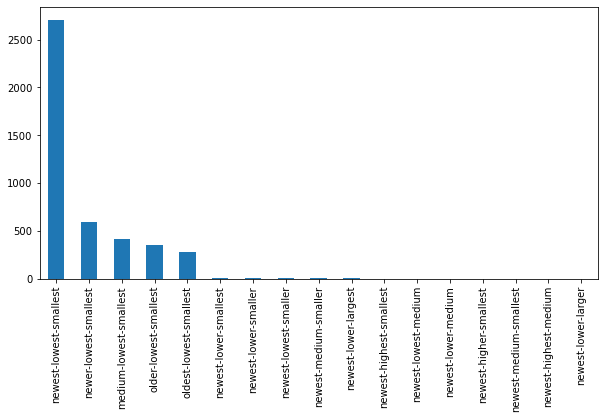

In [38]:
data_rfm['rfm_segment'].value_counts().plot(kind='bar', figsize=(10, 5));


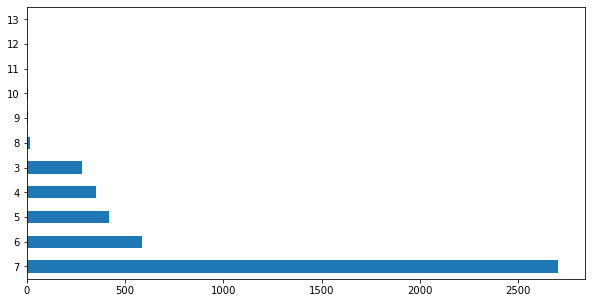

In [39]:
data_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));


# Week 3

### Data Modeling:

### 1. Create clusters using k-means clustering algorithm.



### a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.



In [40]:
print(data_rfm.shape)
data_rfm.head()


(4372, 9)


CustomerID  Recency  Frequency  Monetary recency_labels frequency_labels  \
0     12346.0      326          2      0.00         oldest           lowest   
1     12347.0        2          7   4310.00         newest           lowest   
2     12348.0       75          4   1797.24         newest           lowest   
3     12349.0       19          1   1757.55         newest           lowest   
4     12350.0      310          1    334.40         oldest           lowest   

  monetary_labels             rfm_segment  rfm_score  
0        smallest  oldest-lowest-smallest          3  
1        smallest  newest-lowest-smallest          7  
2        smallest  newest-lowest-smallest          7  
3        smallest  newest-lowest-smallest          7  
4        smallest  oldest-lowest-smallest          3

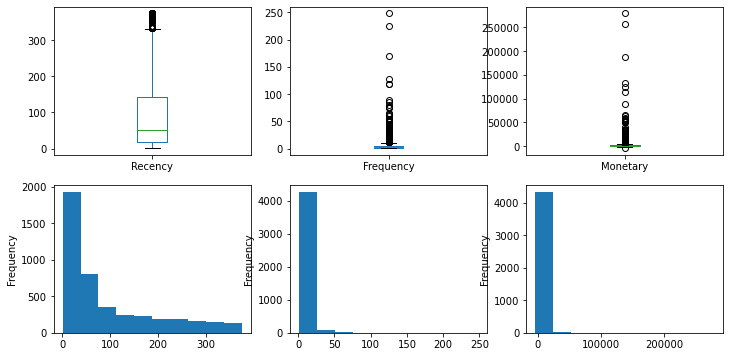

In [41]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    data_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    data_rfm[feature].plot(kind='hist')

Outliers: Frequency and Monetary features in above data seem to have lot of outliers. Lets drop them.


In [42]:
data_rfm = data_rfm[(data_rfm['Frequency']<60) & (data_rfm['Monetary']<40000)]
data_rfm.shape

(4346, 9)

26 Customers removed as outlier from out data.



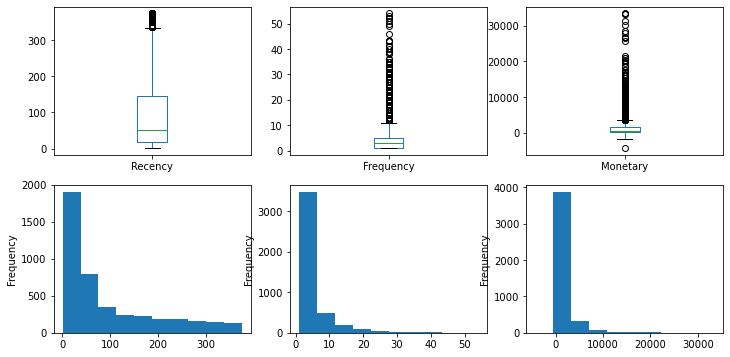

In [43]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    data_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    data_rfm[feature].plot(kind='hist')

 Log Transformation: Now since all three features have right skewed data therefore we will use log transformation of these features in our model.



In [44]:
data_rfm_log_trans = pd.DataFrame()
data_rfm_log_trans['Recency'] = np.log(data_rfm['Recency'])
data_rfm_log_trans['Frequency'] = np.log(data_rfm['Frequency'])
data_rfm_log_trans['Monetary'] = np.log(data_rfm['Monetary']-data_rfm['Monetary'].min()+1)

Standard Scalar Transformation: It is extremely important to rescale the features so that they have a comparable scale.



In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_rfm_scaled = scaler.fit_transform(data_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
data_rfm_scaled

data_rfm_scaled = pd.DataFrame(data_rfm_scaled)
data_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
data_rfm_scaled.head()

Recency  Frequency  Monetary
0  1.402988  -0.388507 -0.770882
1 -2.100874   0.967301  1.485019
2  0.392218   0.361655  0.364153
3 -0.552268  -1.138669  0.342934
4  1.368370  -1.138669 -0.527393

### b. Build K-Means Clustering Model and Decide the optimum number of clusters to be formed.



In [50]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [51]:
kmeans.labels_


array([1, 2, 0, ..., 0, 2, 0])

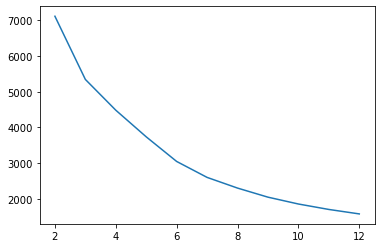

In [52]:
# Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(data_rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd);

In [53]:
# Creating dataframe for exporting to create visualization in tableau later
data_inertia = pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'intertia'])
data_inertia

clusters     intertia
0          2  7113.274292
1          3  5343.290937
2          4  4481.175785
3          5  3734.883797
4          6  3045.114918
5          7  2598.546469
6          8  2299.270884
7          9  2044.793223
8         10  1853.106870
9         11  1700.543965
10        12  1575.600577

In [56]:
# Finding the Optimal Number of Clusters with the help of Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(data_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44128687285763063
For n_clusters=3, the silhouette score is 0.38146773602245704
For n_clusters=4, the silhouette score is 0.36223699606571813
For n_clusters=5, the silhouette score is 0.36654581129416625
For n_clusters=6, the silhouette score is 0.3534470204913216
For n_clusters=7, the silhouette score is 0.3429609820749398
For n_clusters=8, the silhouette score is 0.3409636880059341
For n_clusters=9, the silhouette score is 0.34662992989877556
For n_clusters=10, the silhouette score is 0.35642130981523185


In [57]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

### c. Analyze these clusters and comment on the results.



In [58]:
# assign the label
data_rfm['Cluster_Id'] = kmeans.labels_
data_rfm.head()

CustomerID  Recency  Frequency  Monetary recency_labels frequency_labels  \
0     12346.0      326          2      0.00         oldest           lowest   
1     12347.0        2          7   4310.00         newest           lowest   
2     12348.0       75          4   1797.24         newest           lowest   
3     12349.0       19          1   1757.55         newest           lowest   
4     12350.0      310          1    334.40         oldest           lowest   

  monetary_labels             rfm_segment  rfm_score  Cluster_Id  
0        smallest  oldest-lowest-smallest          3           1  
1        smallest  newest-lowest-smallest          7           2  
2        smallest  newest-lowest-smallest          7           0  
3        smallest  newest-lowest-smallest          7           1  
4        smallest  oldest-lowest-smallest          3           1

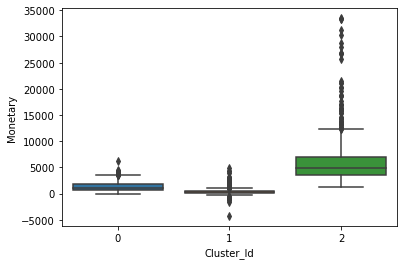

In [59]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=data_rfm);

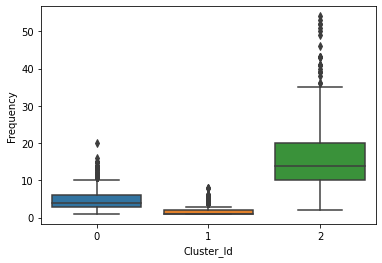

In [60]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=data_rfm);

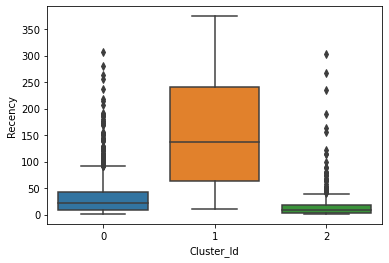

In [61]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=data_rfm);

### Inference:
